In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv('Electric_Production.csv',index_col=0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.columns =['energy production']

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
def adf_test(series):
    result = adfuller(series)
    print("ADF statistics:{}".format(result[0]))
    print('p-value:{}'.format(result[1]))
    if(result[1]<=0.05):
        print("strong evidence aginst the null hypothesis,reject the null hypothesis")
    else:
        print("weak evidence aginst the null hypothesis,time series has a unit root, indicatling it is non-stationary")


In [7]:
adf_test(data['energy production'])

ADF statistics:-2.25699035004723
p-value:0.18621469116587275
weak evidence aginst the null hypothesis,time series has a unit root, indicatling it is non-stationary


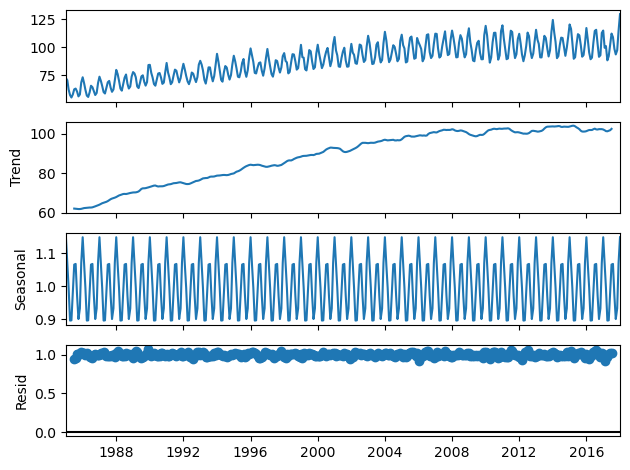

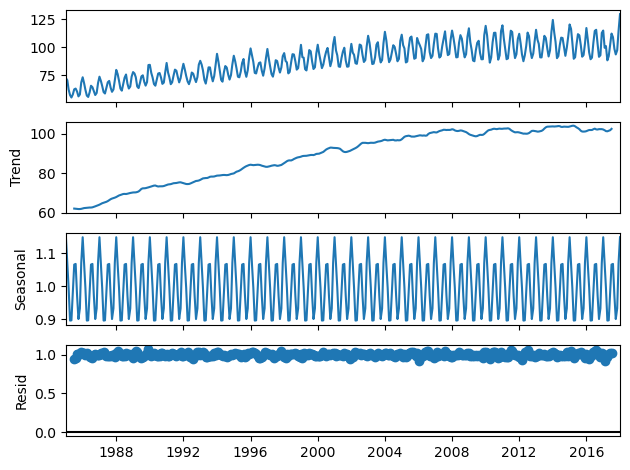

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data,model='multiplicative')
result.plot()

## Holt's winter method

In [9]:
m=12
alpha =1/(2*m) ## m is the window size which is fixed 12

In [10]:
#single exponmential smoathing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#bouble and triple exponmential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
data['HWSE1'] = SimpleExpSmoothing(data['energy production']).fit(smoothing_level=alpha).fittedvalues

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [12]:
data

,energy production,HWSE1
DATE,,
1985-01-01,72.5052,72.505200
1985-02-01,70.6720,72.505200
1985-03-01,62.4502,72.428817
1985-04-01,57.4714,72.013041
1985-05-01,55.3151,71.407139
...,...,...
2017-09-01,98.6154,102.442055
2017-10-01,93.6137,102.282611
2017-11-01,97.3359,101.921406


<Axes: xlabel='DATE'>

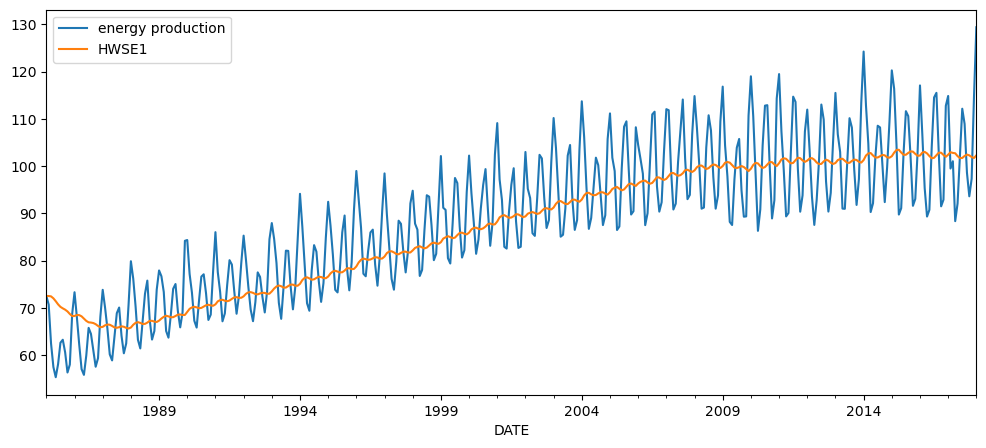

In [13]:
pd.concat([data['energy production'],data['HWSE1']],axis=1).plot(figsize=(12,5),legend=True)

## double HWES

In [14]:
data['HWES_ADD'] = ExponentialSmoothing(data['energy production'],trend = 'add').fit().fittedvalues

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
data['HWES_MUL'] = ExponentialSmoothing(data['energy production'],trend = 'mul').fit().fittedvalues

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [16]:
data

,energy production,HWSE1,HWES_ADD,HWES_MUL
DATE,,,,
1985-01-01,72.5052,72.505200,73.474298,77.425192
1985-02-01,70.6720,72.505200,72.646357,71.775424
1985-03-01,62.4502,72.428817,70.813157,69.939161
1985-04-01,57.4714,72.013041,62.591357,61.791893
1985-05-01,55.3151,71.407139,57.612557,56.832161
...,...,...,...,...
2017-09-01,98.6154,102.442055,109.072357,109.308565
2017-10-01,93.6137,102.282611,98.756557,98.933155
2017-11-01,97.3359,101.921406,93.754857,93.866109


<Axes: xlabel='DATE'>

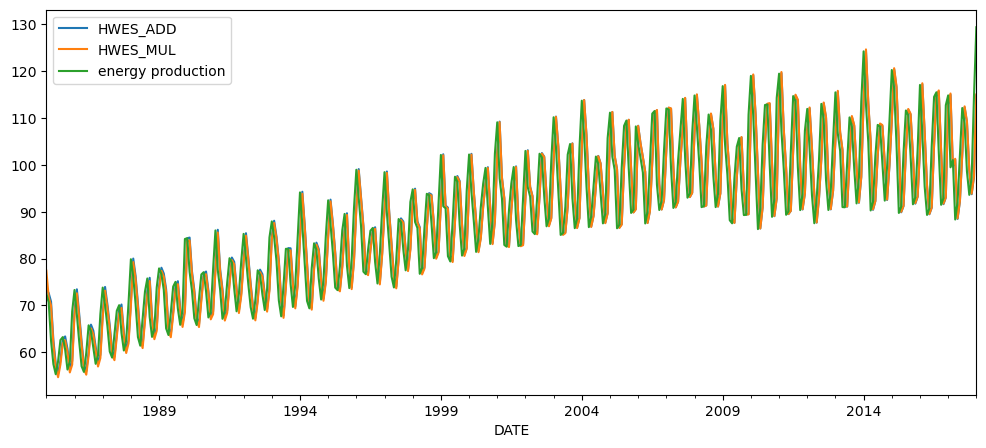

In [17]:
pd.concat([data['HWES_ADD'],data['HWES_MUL'],data['energy production']],axis=1).plot(figsize=(12,5),legend=True)

### Triple HWES

In [18]:
data['HWES3_ADD'] = ExponentialSmoothing(data['energy production'],trend = 'add',seasonal='add',seasonal_periods=12).fit().fittedvalues

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [19]:
data['HWES3_MUL'] = ExponentialSmoothing(data['energy production'],trend = 'mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='DATE'>

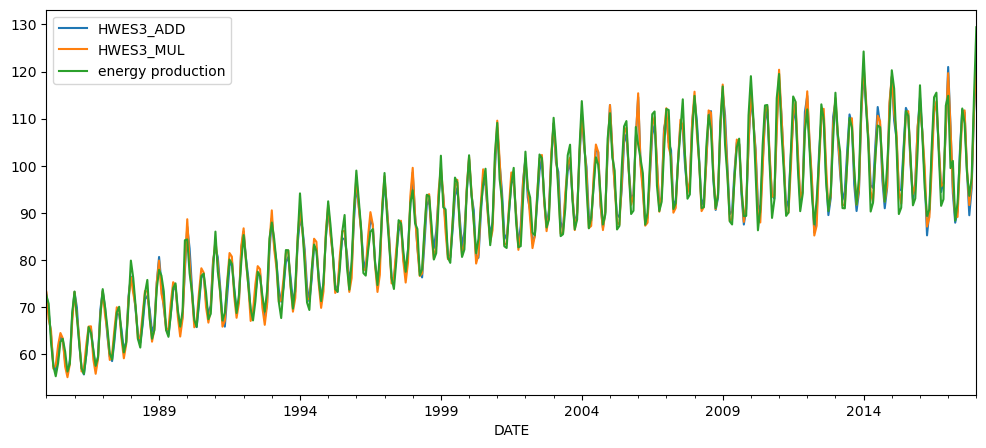

In [20]:
pd.concat([data['HWES3_ADD'],data['HWES3_MUL'],data['energy production']],axis=1).plot(figsize=(12,5),legend=True)

In [21]:
## checking for the best method by calculating rmse


In [22]:
## split the data into train and test
train = data.loc['1985-01-01':'2015-12-01']
test = data.loc['2016-01-01':]


In [27]:
model = ExponentialSmoothing(train['energy production'],trend = 'mul',seasonal='mul',seasonal_periods=12).fit()

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [28]:
#making prediction
prediction = model.forecast(25)


<Axes: xlabel='DATE'>

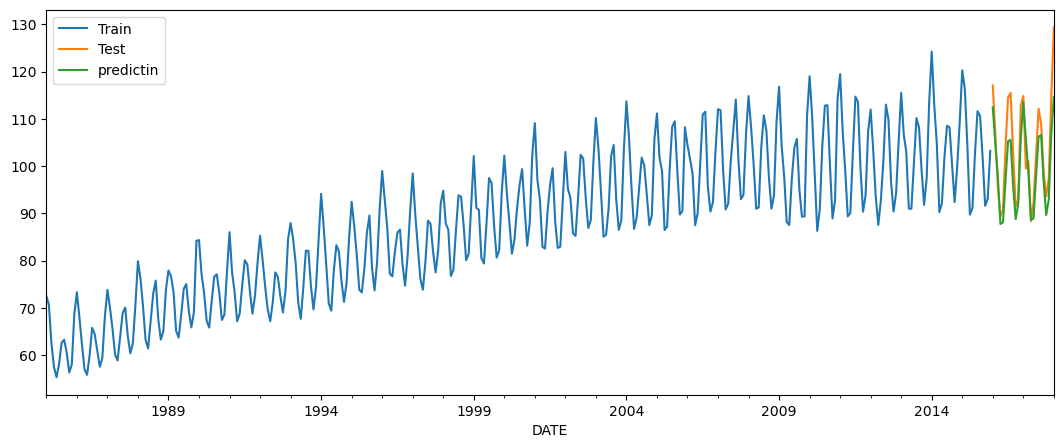

In [29]:
train['energy production'].plot(figsize=(13,5),legend=True,label='Train')
test['energy production'].plot(figsize=(13,5),legend=True,label='Test')
prediction.plot(figsize=(13,5),legend=True,label='predictin')

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test['energy production'],prediction))
print(rmse)


5.714361852323713


<Axes: >

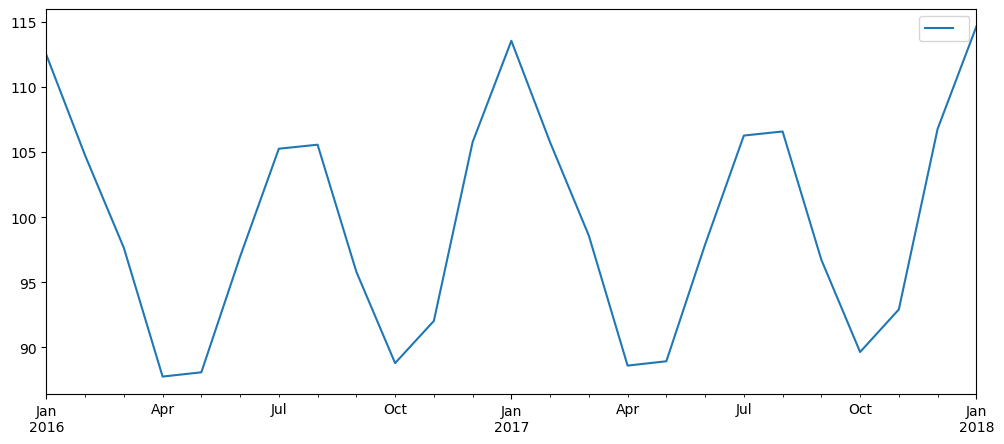

In [31]:
prediction.plot(figsize=(12,5),legend= True)